# Project - Bike Rental Demand Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

In [2]:
train_df = pd.read_csv(r'D:\ML\Bike Rental Demand Analysis\Dataset\train.csv')

In [3]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
train_df.shape

(10886, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Dealing with Null Values

In [6]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### Changing into datetime format

In [9]:
def change_into_datetime(col):
    train_df[col] = pd.to_datetime(train_df[col])

In [10]:
for i in ['datetime']:
    change_into_datetime(i)

In [11]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

In [12]:
train_df['year'].unique()

array([2011, 2012], dtype=int64)

### Mapping key values to Dictionary

In [13]:
dict = {2011 :'1', 2012 :'2'}

In [14]:
train_df['year'] = train_df['year'].map(dict)
train_df['year'].unique()

array(['1', '2'], dtype=object)

In [15]:
train_df.drop('datetime',axis=1,inplace=True)

In [16]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011-01-01,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011-01-01,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011-01-01,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011-01-01,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011-01-01,4,5


## Performing Exploratory Data Analysis 

In [17]:
train_df.drop('count',axis=1).describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,month,hour,day of the week
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,6.50689,11.541613,3.011023
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,3.44750,6.915838,2.004741
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,4.00000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,7.00000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,9.00000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,12.00000,23.000000,6.000000


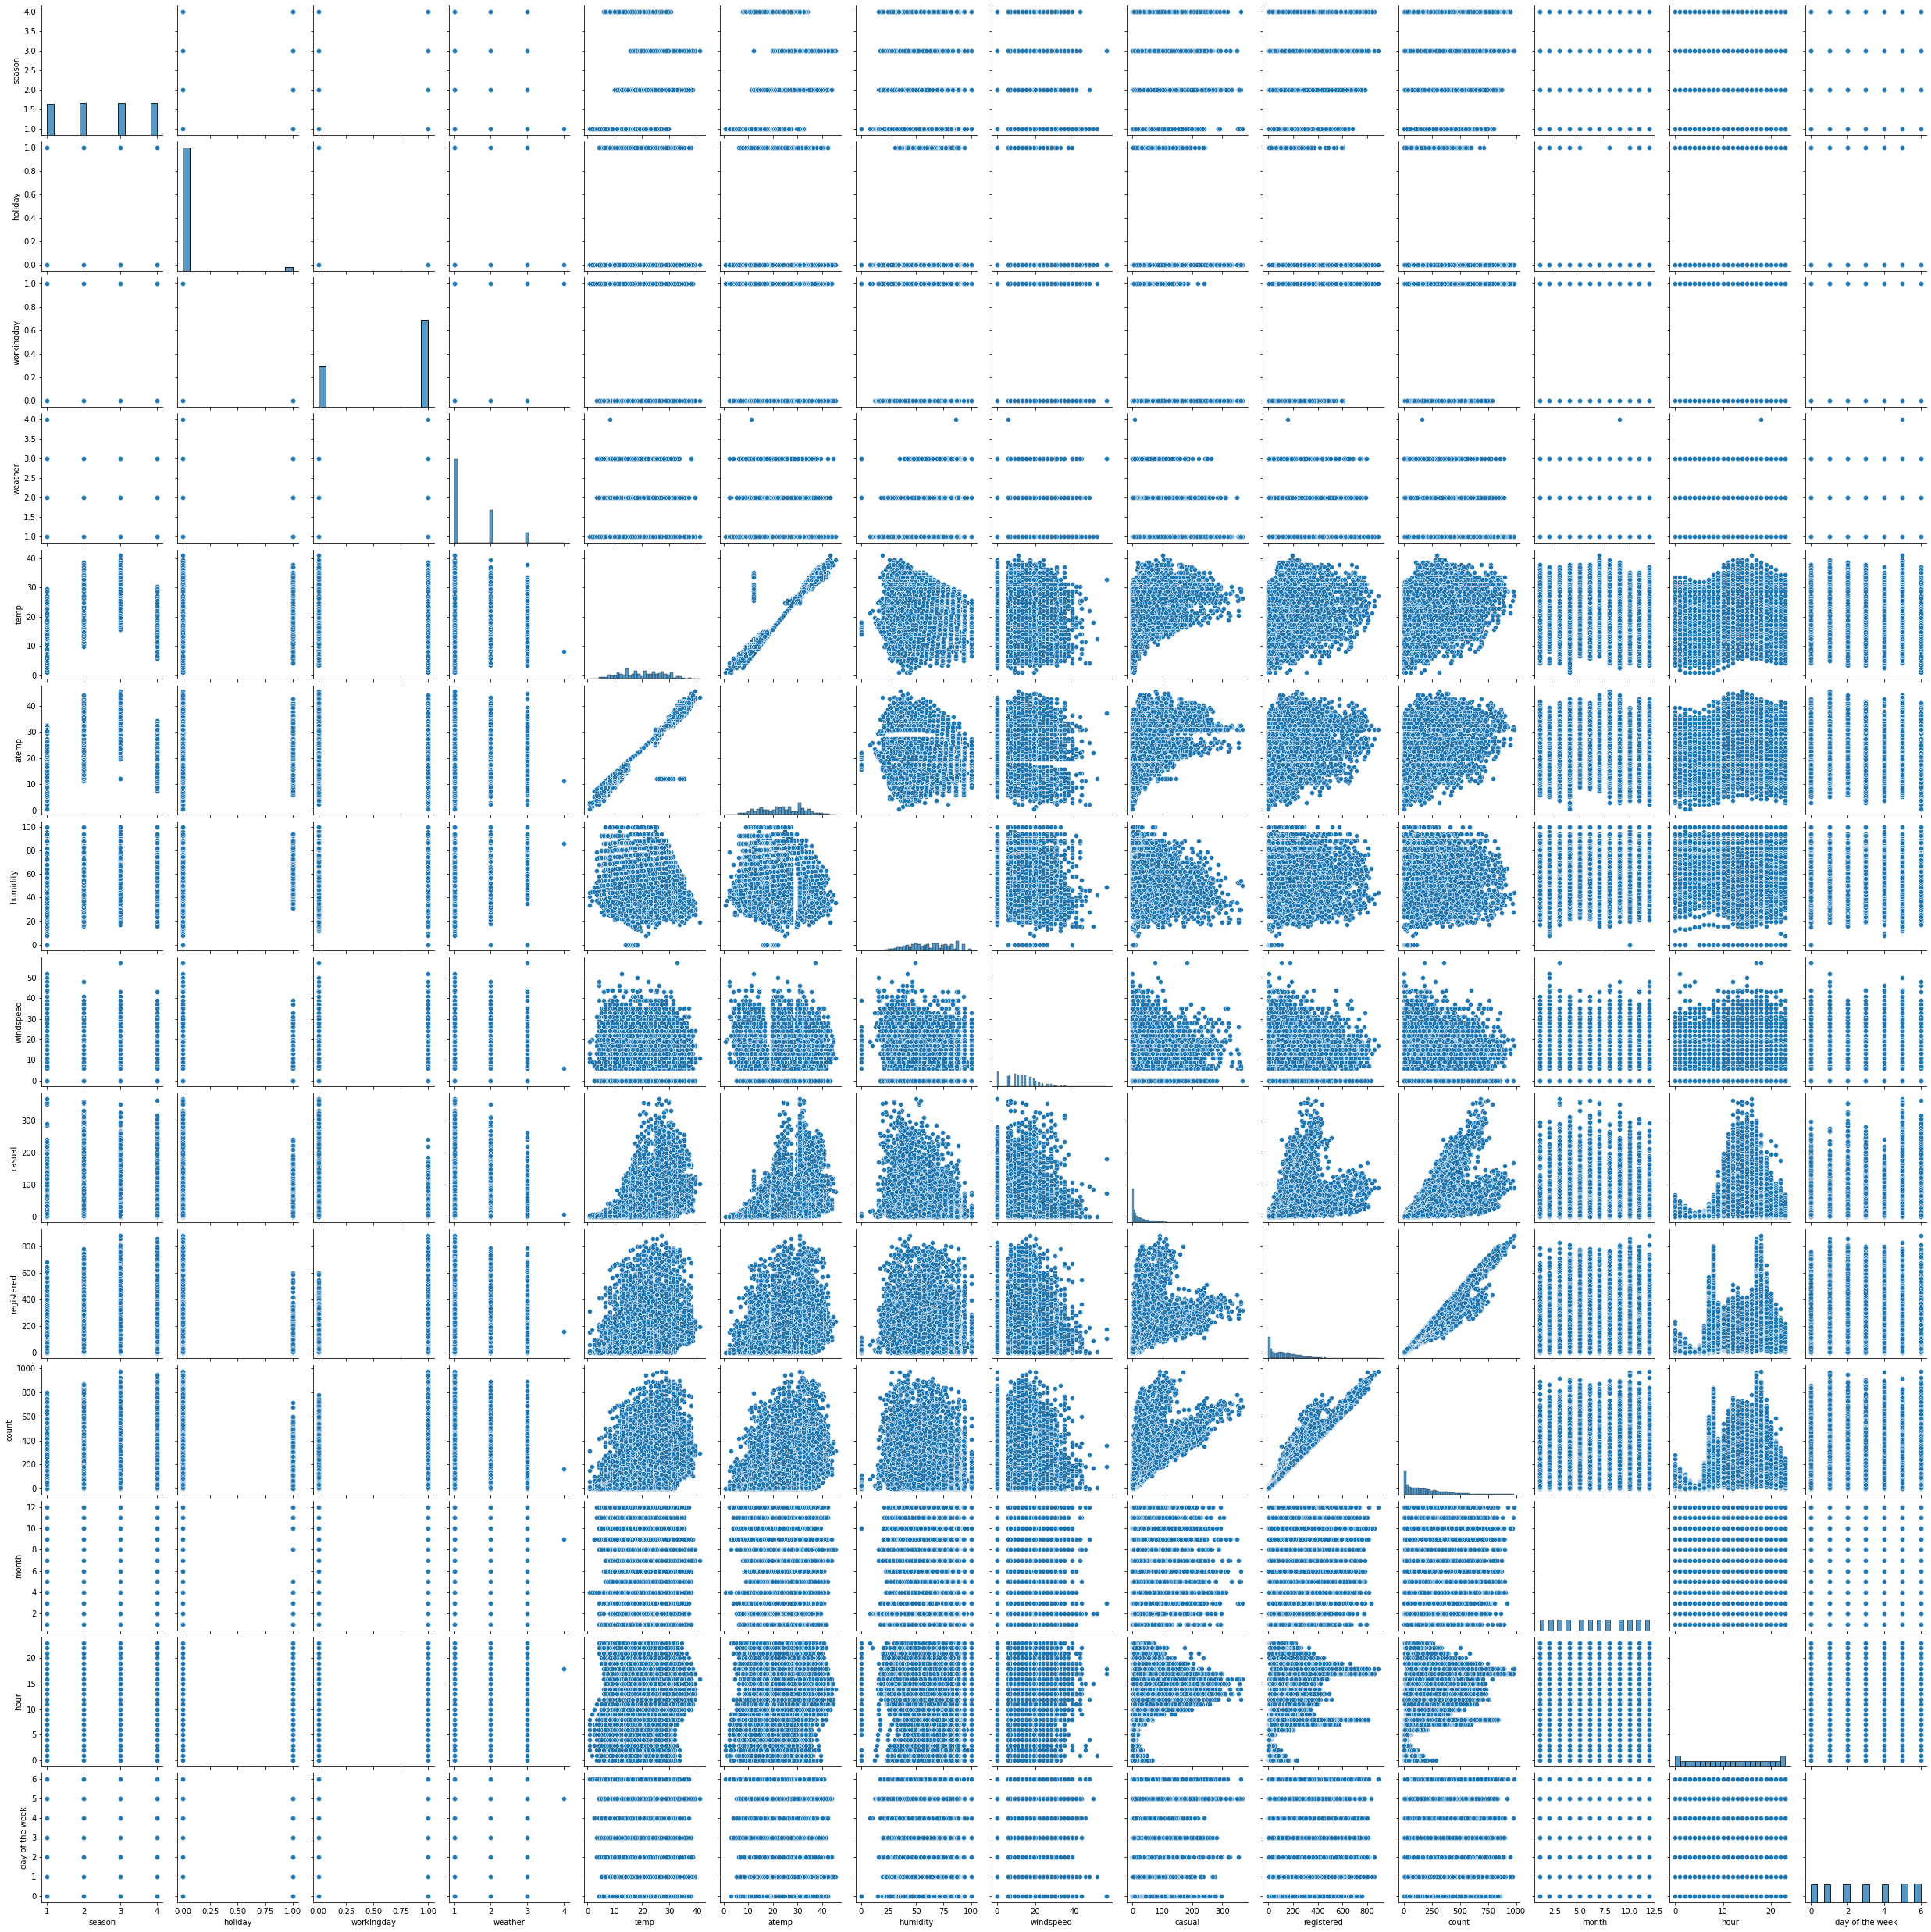

In [18]:
sns.pairplot(train_df);

### Distribution of target variable 'count'

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


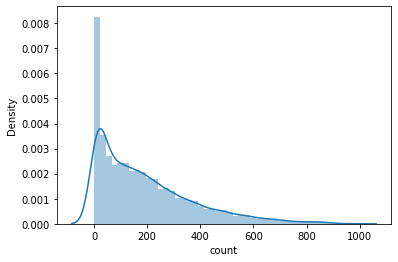

In [19]:
sns.distplot(train_df['count']);

Inference - The target variable is right skewed and hence we have to take the log of the variable to check if the distribution becomes normal or not.

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


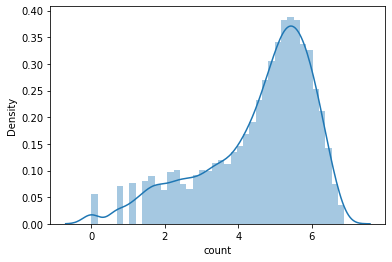

In [20]:
sns.distplot(np.log(train_df['count']));

### Visualizing the Demand using multiple variables

###  Demand per day of the week

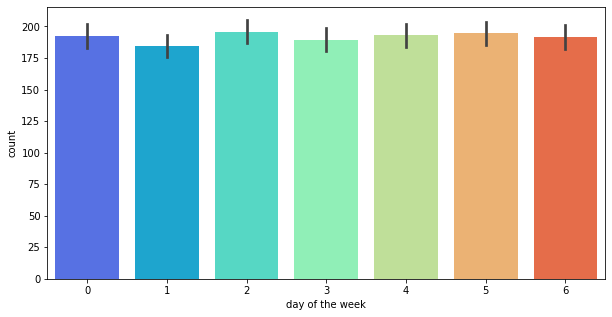

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x = 'day of the week', y = 'count', palette='rainbow');

Inference -  demand of bike rentals were almost same for each day of the week. So this feature will not be useful in predicting the demand therefore we will have to drop this feature.

### Demand per month

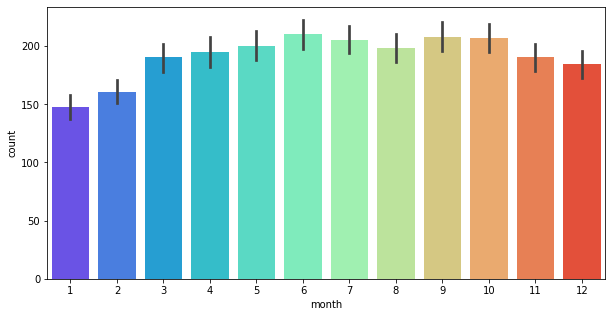

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x='month', y = 'count', palette = 'rainbow');

Inference - Demand for bike rentals was high during the months of summer and the demand drops during the months of winter.

### Year Month Demand

In [23]:
group_year_month = train_df.groupby(['year','month'])
average_year_month = group_year_month['count'].mean()

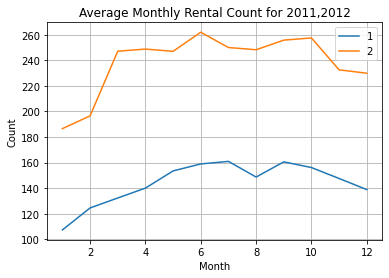

In [24]:
for year in average_year_month.index.levels[0]:
    plt.plot(average_year_month[year].index,average_year_month[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Monthly Rental Count for 2011,2012')
plt.show()

### Demand per hour

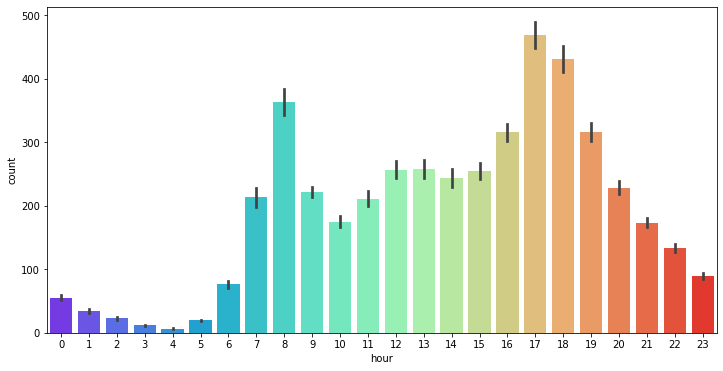

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data = train_df, x = 'hour', y = 'count', palette = 'rainbow');

Inference - Demand for bike rentals were high during the office hours and it was low during the non-working hours as it might be possible that most of the people use the bike rental services to reach their office premises or leave their premises during these hours.

### Year Hour Demand 

In [26]:
group_year_hour = train_df.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()

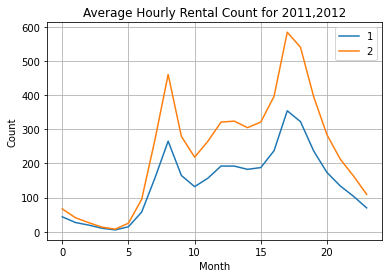

In [27]:
for year in average_year_hour.index.levels[0]:
    plt.plot(average_year_hour[year].index,average_year_hour[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Rental Count for 2011,2012')
plt.show()

### Average Hourly Count

In [28]:
group_hour = train_df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()

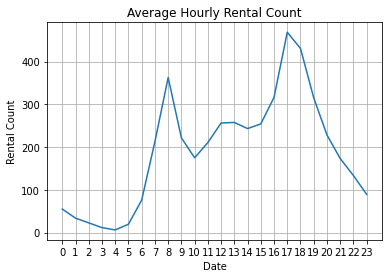

In [29]:
plt.plot(average_by_hour.index,average_by_hour)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count')
plt.show()

### Demand per season

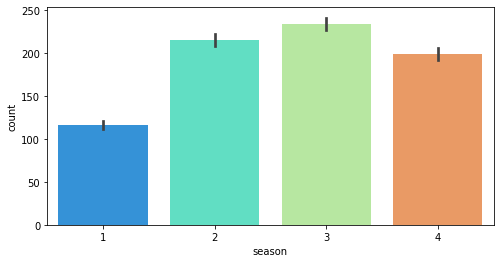

In [30]:
plt.figure(figsize = (8,4))
sns.barplot(data = train_df, x = 'season', y = 'count', palette = 'rainbow');

Inference - Demand was high during the summer and fall seasons while it drops during winter and spring season as the weather during these seasons might not be suitable for bike rentals.

### Demand as per holidays

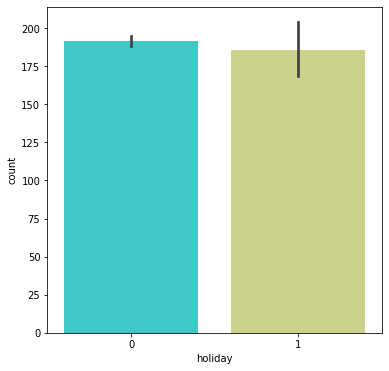

In [31]:
plt.figure(figsize=(6,6))
sns.barplot(data = train_df, x = 'holiday', y = 'count', palette = 'rainbow');

Inference - Demand was high during working days and low during holidays.

### Demand on working days

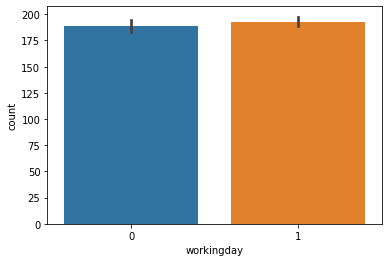

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(data = train_df, x = 'workingday', y = 'count');

Inference - It doesn't affect the demand much as it remains almost the same both the time, therefore we will have to drop this column.

### Working day Hour Demand

In [33]:
group_workingday_hour = train_df.groupby(['workingday','hour'])
average_workingday_hour = group_workingday_hour['count'].mean()

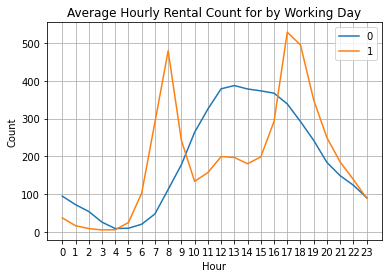

In [34]:
for workingday in average_workingday_hour.index.levels[0]:
    plt.plot(average_workingday_hour[workingday].index,average_workingday_hour[workingday],label=workingday)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count for by Working Day')
plt.show()

### Visualization of the continuous varibles using Histogram

###### Continuous features - temp, atemp, humidity, windspeed, count

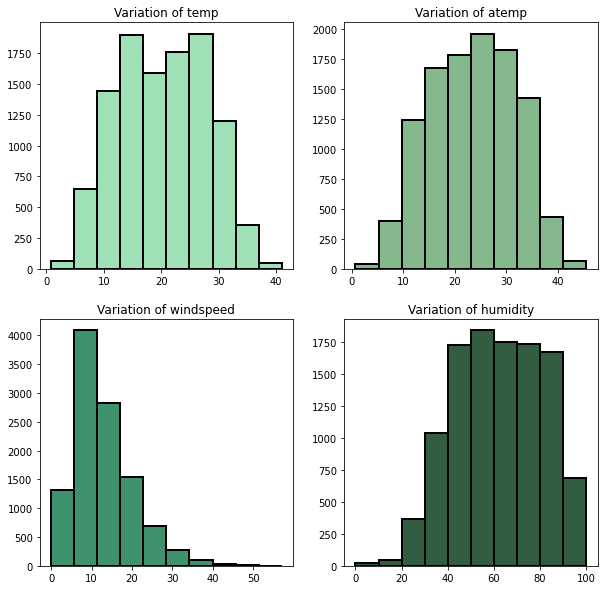

In [35]:
train_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train_df,edgecolor="black",linewidth=2,color='#a0e0b6')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train_df,edgecolor="black",linewidth=2,color='#85b98d')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train_df,edgecolor="black",linewidth=2,color='#3e936e')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train_df,edgecolor="black",linewidth=2,color='#335d40')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

### Temperature vs Demand

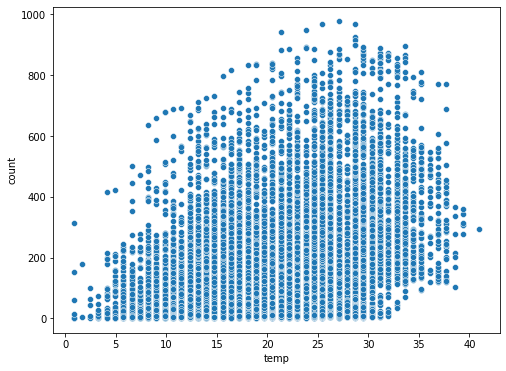

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'temp', y = 'count');

##### Since this is hard to visualze. a better way is to convert the 'temp' variable into intervals or so called bins and then treat it like a discrete variable.

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


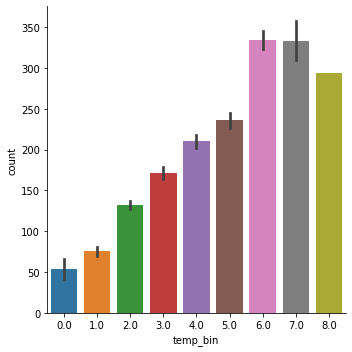

In [37]:
viz_df=train_df.copy()
viz_df.temp.describe()
viz_df['temp_bin']=np.floor(viz_df['temp'])//5
viz_df['temp_bin'].unique()

# now we can visualize with temp as discrete values
sns.factorplot(x="temp_bin",y="count",data=viz_df,kind='bar')

Inference - The demand is highest for bins 6 and 7 which is about tempearure  30-35(bin 6) and 35-40 (bin 7).

### Demand vs aTemp

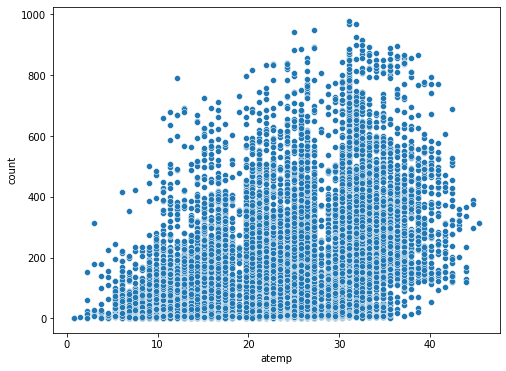

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'atemp', y = 'count');

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


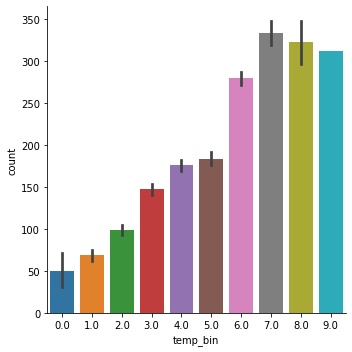

In [39]:
viz_df=train_df.copy()
viz_df.temp.describe()
viz_df['temp_bin']=np.floor(viz_df['atemp'])//5
viz_df['temp_bin'].unique()

# now we can visualize with temp as discrete values
sns.factorplot(x="temp_bin",y="count",data=viz_df,kind='bar')

##### Inference  - We can see that this plot is almost similar to the previous plot of temperature and demand which means there is a high correlation between temp and atemp features.

### Humidity vs Demand

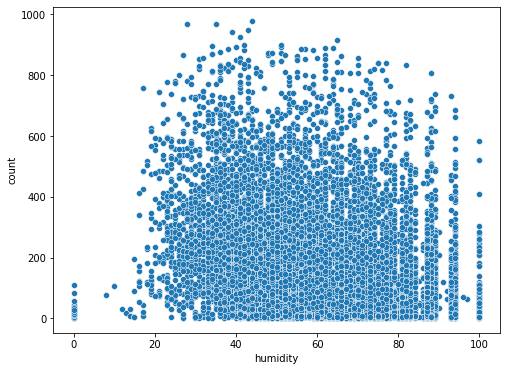

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'humidity', y='count');

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


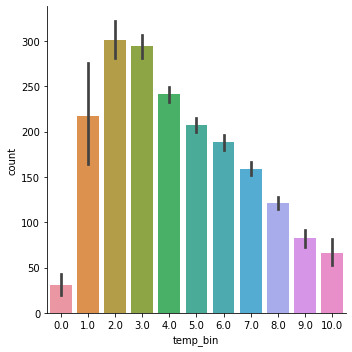

In [41]:
viz_df=train_df.copy()
viz_df.temp.describe()
viz_df['temp_bin']=np.floor(viz_df['humidity'])//10
viz_df['temp_bin'].unique()

# now we can visualize with temp as discrete values
sns.factorplot(x="temp_bin",y="count",data=viz_df,kind='bar')

Inference - Humidity is not much correlated to Demand

### Windspeed vs Demand

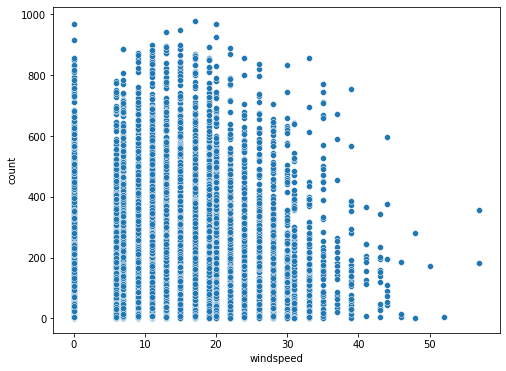

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'windspeed', y='count');

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


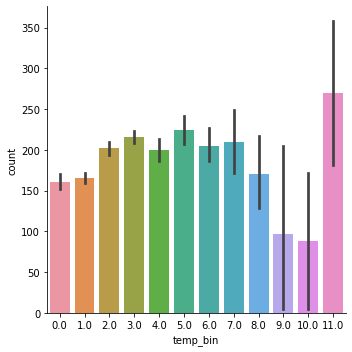

In [43]:
viz_df=train_df.copy()
viz_df.temp.describe()
viz_df['temp_bin']=np.floor(viz_df['windspeed'])//5
viz_df['temp_bin'].unique()

# now we can visualize with temp as discrete values
sns.factorplot(x="temp_bin",y="count",data=viz_df,kind='bar')

Inference - Since windspeed has a very low correlation with the demand so it does not affect the demand much.

### Visualization of the Correlation Matrix of continuous features and understanding how it will affect the Target variable

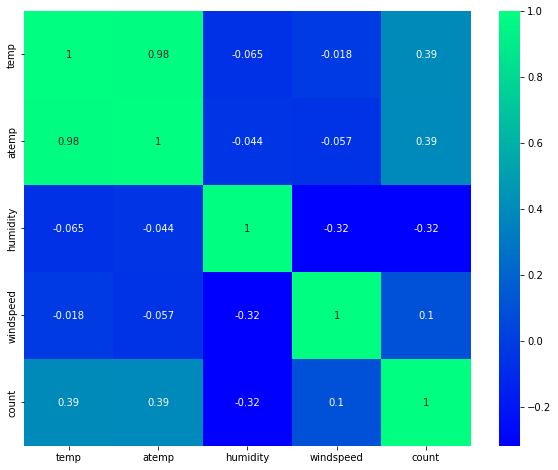

In [44]:
corrdata = train_df[["temp","atemp","humidity","windspeed","count"]]
corrmat = corrdata.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot = True, cmap= 'winter');

### Visualization of the Correlation Matrix of all the independent features 

<AxesSubplot:>

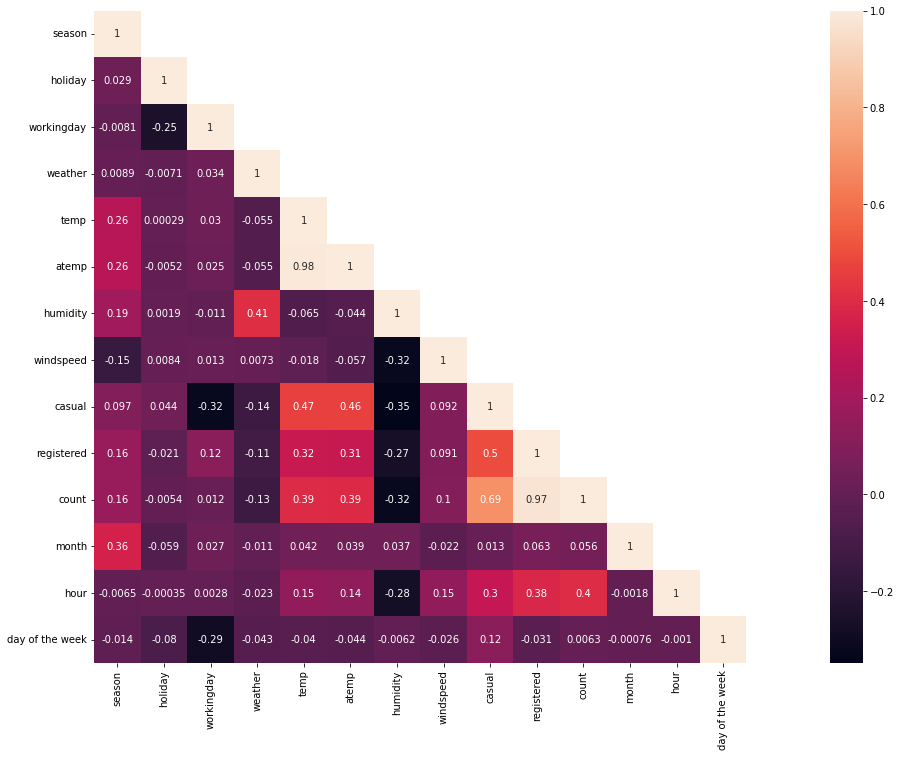

In [45]:
cor_mat= train_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## Data Preprocessing

In [46]:
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,2011-01-01,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011-01-01,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2011-01-01,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,2011-01-01,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,2011-01-01,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,12,2012-12-19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,12,2012-12-19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,12,2012-12-19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2,12,2012-12-19,22,2


In [47]:
train_df["year"] = pd.to_numeric(train_df["year"])

### Performing One Hot Encoding on categorical features

In [48]:
season = pd.get_dummies(train_df['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(train_df['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(train_df['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(train_df['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(train_df['hour'],prefix='hour',drop_first=True)
train_df = pd.concat([train_df,season,weather,holiday,month,hour],axis=1)
train_df.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)

In [49]:
pd.set_option('display.max_columns',52)
train_df.head()

,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,date,day of the week,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,9.84,14.395,81,0.0,3,13,16,1,2011-01-01,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,9.02,13.635,80,0.0,8,32,40,1,2011-01-01,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,9.02,13.635,80,0.0,5,27,32,1,2011-01-01,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,9.84,14.395,75,0.0,3,10,13,1,2011-01-01,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,9.84,14.395,75,0.0,0,1,1,1,2011-01-01,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dropping the features with low correlation

In [50]:
train_df.drop(['date','day of the week','year','windspeed','workingday'], axis=1, inplace=True)

In [51]:
train_df.head()

,temp,atemp,humidity,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,3,13,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,8,32,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,5,27,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,3,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
train_df.columns.to_series().groupby(train_df.dtypes).groups

{uint8: ['season_2', 'season_3', 'season_4', 'weather_2', 'weather_3', 'weather_4', 'holiday_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'], int64: ['humidity', 'casual', 'registered', 'count'], float64: ['temp', 'atemp']}

In [53]:
train_df.dtypes

temp          float64
atemp         float64
humidity        int64
casual          int64
registered      int64
count           int64
season_2        uint8
season_3        uint8
season_4        uint8
weather_2       uint8
weather_3       uint8
weather_4       uint8
holiday_1       uint8
month_2         uint8
month_3         uint8
month_4         uint8
month_5         uint8
month_6         uint8
month_7         uint8
month_8         uint8
month_9         uint8
month_10        uint8
month_11        uint8
month_12        uint8
hour_1          uint8
hour_2          uint8
hour_3          uint8
hour_4          uint8
hour_5          uint8
hour_6          uint8
hour_7          uint8
hour_8          uint8
hour_9          uint8
hour_10         uint8
hour_11         uint8
hour_12         uint8
hour_13         uint8
hour_14         uint8
hour_15         uint8
hour_16         uint8
hour_17         uint8
hour_18         uint8
hour_19         uint8
hour_20         uint8
hour_21         uint8
hour_22   

### Visualization of the Correlation Matrix of the preprocessed data

<AxesSubplot:>

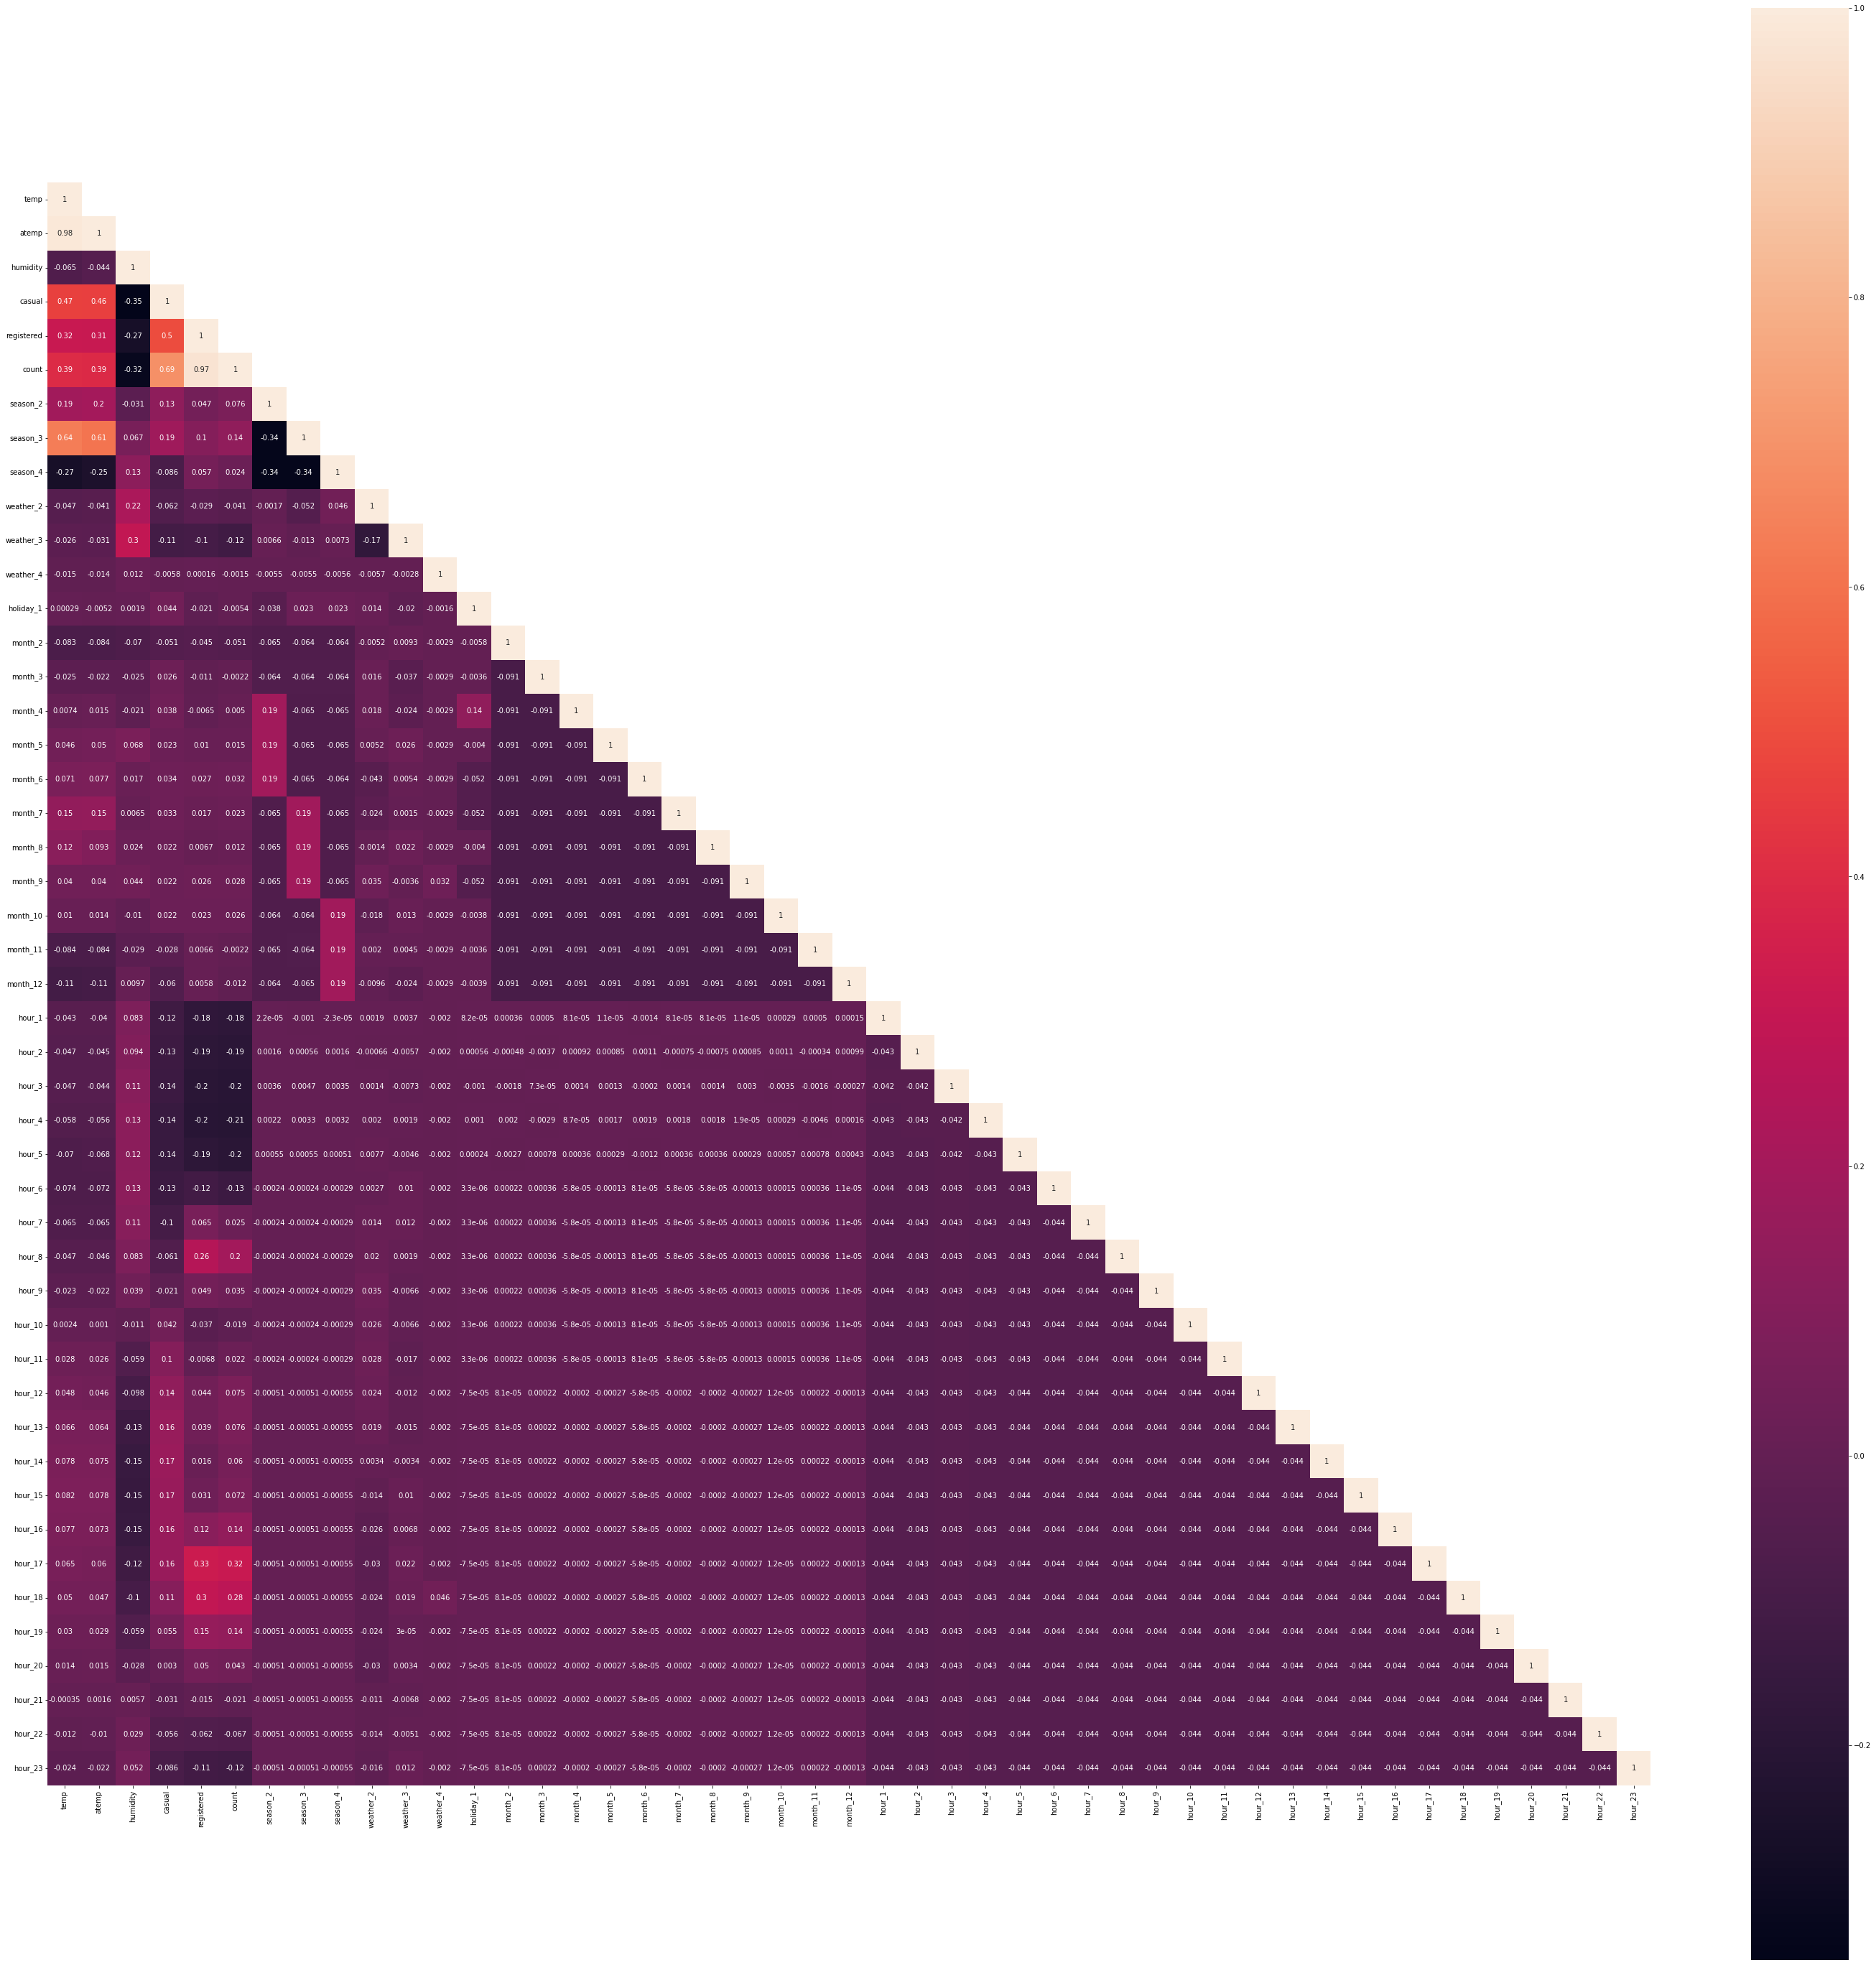

In [54]:
cor_mat= train_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(50,50)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### Splitting the data

In [55]:
X = train_df.drop('count',axis=1)

In [56]:
X.shape

(10886, 46)

In [57]:
y = np.log(train_df['count'])

In [58]:
y.shape

(10886,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Using Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
linear_rg = LinearRegression()

In [63]:
linear_rg.fit(X_train,y_train)

LinearRegression()

In [64]:
preds1 = linear_rg.predict(X_test)

In [65]:
preds1

array([4.07868884, 4.46487478, 5.34815463, ..., 2.15717399, 4.77338683,
       4.70726887])

In [66]:
from sklearn import metrics

r2_score is:0.8749272782178329
MAE: 0.341625805852196
MSE: 0.2607563963039369
RMSE: 0.5106431202943371


C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

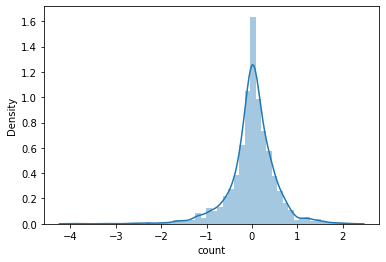

In [67]:
r2_score = metrics.r2_score(y_test,preds1)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds1))
print('MSE:',metrics.mean_squared_error(y_test,preds1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds1)))
sns.distplot(y_test-preds1)

#### Accuracy - 86.55%

### Using Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dt_rg = DecisionTreeRegressor(max_depth=5)

In [70]:
dt_rg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [71]:
preds2 = dt_rg.predict(X_test)

In [72]:
preds2

array([4.02157843, 4.70282974, 5.34802897, ..., 2.35617855, 5.34802897,
       4.98326145])

r2_score is:0.9908932301638164
MAE: 0.11184275216791727
MSE: 0.01898614222682735
RMSE: 0.13779021092525895


C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

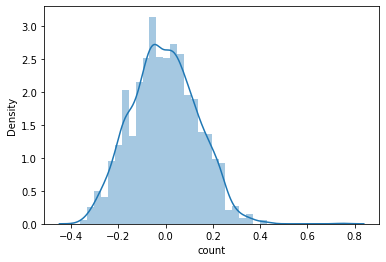

In [73]:
r2_score = metrics.r2_score(y_test,preds2)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds2))
print('MSE:',metrics.mean_squared_error(y_test,preds2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds2)))
sns.distplot(y_test-preds2)

#### Accuracy -  99.03%

### Using Hypertuned KNN 

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [75]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(X_train,y_train)
preds3 = clf_knn.predict(X_test)

In [76]:
preds3

array([3.8150586 , 4.77188719, 5.36376152, ..., 2.03218332, 5.30578203,
       4.92649782])

r2_score is:0.9944097266754341
MAE: 0.04355648503748991
MSE: 0.011654815739970965
RMSE: 0.10795747190431501


C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

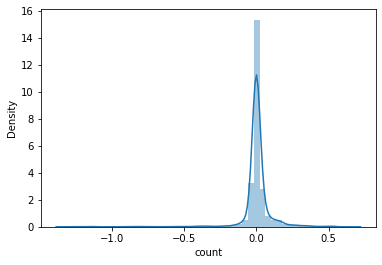

In [77]:
r2_score = metrics.r2_score(y_test,preds3)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds3))
print('MSE:',metrics.mean_squared_error(y_test,preds3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds3)))
sns.distplot(y_test-preds3)

#### Accuracy - 99.32%

### Using Hypertuned Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(X_train,y_train)
preds4 = clf_rf.predict(X_test)

In [80]:
preds4

array([3.85533699, 4.77542796, 5.36707845, ..., 2.19722458, 5.31669394,
       4.97003558])

r2_score is:0.9998487631714439
MAE: 0.00556964815564615
MSE: 0.000315304327280922
RMSE: 0.017756810729433425


C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

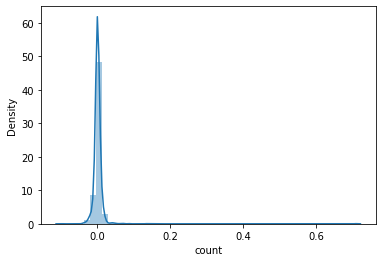

In [81]:
r2_score = metrics.r2_score(y_test,preds4)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds4))
print('MSE:',metrics.mean_squared_error(y_test,preds4))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds4)))
sns.distplot(y_test-preds4)

#### Accuracy - 99.995%

### Using Hypertuned XGBoost

In [82]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [83]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    XGB = XGBRegressor()
    
    gridsearch = GridSearchCV(estimator = XGB,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gridsearch.fit(X_train,y_train)

    return gridsearch.best_params

In [84]:
XGB = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

XGB.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test),(X_test,y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
preds5 = XGB.predict(X_test)

In [86]:
preds5

array([3.848116 , 4.777493 , 5.3724265, ..., 2.1766016, 5.311469 ,
       5.0146585], dtype=float32)

r2_score is:0.9996761979676574
MAE: 0.014769496603075515
MSE: 0.0006750748673768867
RMSE: 0.025982202896923247


C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

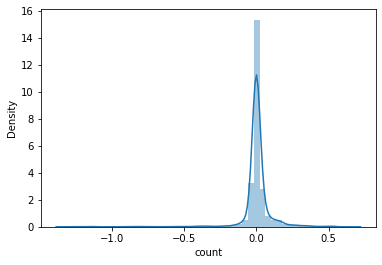

In [87]:
r2_score = metrics.r2_score(y_test,preds5)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds5))
print('MSE:',metrics.mean_squared_error(y_test,preds5))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds5)))
sns.distplot(y_test-preds3)

#### Accuracy - 99.97%

## After performing the model comparative analysis we can conclude that almost all the models had an accuracy above 99% except the Linear Regressor. The Hypertuned Random Forest Regressor gave best result with 99.995% accuracy

### Saving the Hypertuned Random Forest Regressor and XGBoost Regressor models to get predictions from the test set.

In [88]:
import pickle

file = open(r'D:\ML\Bike Rental Demand Analysis\Dataset\random_forest_model.pkl','wb')
pickle.dump(clf_rf, file)

In [91]:
file = open(r'D:\ML\Bike Rental Demand Analysis\Model\tuned_xgb_model.pkl','wb')
pickle.dump(XGB, file)